# Fuel Dispense Prediction

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fuel_path="/Users/macbook/Desktop/MOBA/new_dispense.csv"
fuel_data=pd.read_csv(fuel_path)
fuel_data.columns
#Inputs : Date, Time, Vehicle ID, Fuel, Consumption Unit,

Index(['epoch', 'dispensed_date', 'transaction_id', 'transaction_type',
       'site_name', 'company', 'dispenser_type_name',
       'new_dispenser_unit_name', 'new_sap_code', 'new_sap_desc',
       'customer_object_type', 'dispensed_fuel', 'max_fuel_capacity',
       'current_reading', 'previous_reading', 'avg_status', 'munit',
       'cal_average', 'equip_benchmark_avg', 'tolerance_percent',
       'remaining_fuel', 'group_name'],
      dtype='object')

<AxesSubplot:>

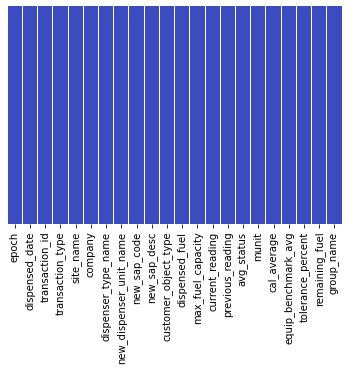

In [22]:
#Heat Map to visualize the null values in the data.
sns.heatmap(fuel_data.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [20]:
fuel_data.shape

(88632, 22)

In [21]:
fuel_data.dropna(inplace = True) 
fuel_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88632 entries, 0 to 121906
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   epoch                    88632 non-null  int64  
 1   dispensed_date           88632 non-null  object 
 2   transaction_id           88632 non-null  int64  
 3   transaction_type         88632 non-null  object 
 4   site_name                88632 non-null  object 
 5   company                  88632 non-null  object 
 6   dispenser_type_name      88632 non-null  object 
 7   new_dispenser_unit_name  88632 non-null  object 
 8   new_sap_code             88632 non-null  object 
 9   new_sap_desc             88632 non-null  object 
 10  customer_object_type     88632 non-null  object 
 11  dispensed_fuel           88632 non-null  float64
 12  max_fuel_capacity        88632 non-null  float64
 13  current_reading          88632 non-null  float64
 14  previous_reading     

In [ ]:
# Data Visualization
plt.figure(figsize=(10,4))
plt.title("Fuel Dispense Per Vehicle Type")
sns.lineplot(x=fuel_data['customer_object_type'], y=fuel_data['dispensed_fuel'])

In [23]:
#Printing the Null Values if any!
fuel_data.isnull().sum()

epoch                      0
dispensed_date             0
transaction_id             0
transaction_type           0
site_name                  0
company                    0
dispenser_type_name        0
new_dispenser_unit_name    0
new_sap_code               0
new_sap_desc               0
customer_object_type       0
dispensed_fuel             0
max_fuel_capacity          0
current_reading            0
previous_reading           0
avg_status                 0
munit                      0
cal_average                0
equip_benchmark_avg        0
tolerance_percent          0
remaining_fuel             0
group_name                 0
dtype: int64

In [24]:
print(fuel_data['avg_status'].unique())

[0 1 3 2]


In [25]:
print(type(fuel_data['avg_status']))

<class 'pandas.core.series.Series'>


In [27]:
#Encoding the Avg Status with Labels
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
fuel_data.avg_status= le.fit_transform(fuel_data.avg_status)

In [28]:
fuel_data.head(50)

,epoch,dispensed_date,transaction_id,transaction_type,site_name,company,dispenser_type_name,new_dispenser_unit_name,new_sap_code,new_sap_desc,...,max_fuel_capacity,current_reading,previous_reading,avg_status,munit,cal_average,equip_benchmark_avg,tolerance_percent,remaining_fuel,group_name
0,1606902337,02-12-2020 15:15,384,MRFID,RKC - Vasad,rkc,MOBILE BOWSER,GJ-17-UU-6307 (DBS-03),GJ-17-X-8616,GJ-17-X-8616,...,0.0,0.00,0.00,0,Kilometer,0.00,2.25,15.0,0.00,Gujarat region
1,1606902233,02-12-2020 15:13,381,MRFID,RKC - Vasad,rkc,MOBILE BOWSER,GJ-17-UU-6307 (DBS-03),GJ-17-X-8616,GJ-17-X-8616,...,0.0,0.00,0.00,0,Kilometer,0.00,2.25,15.0,0.00,Gujarat region
3,1606902153,02-12-2020 15:12,85,MRFID,PAHR,gr,MOBILE BOWSER,10000043,20001192,VIB. SOIL COMPACTOR RJ09EA3471 CSR-49,...,500.0,0.00,0.00,0,Hours,0.00,10.00,15.0,0.00,Haryana
4,1606902063,02-12-2020 15:11,317,MRFID,RKC - Timba,rkc,STATIC PUMP,STP-04,GJ-17-Y-9984,GJ-17-Y-9984,...,0.0,0.00,0.00,0,Kilometer,0.00,2.75,15.0,0.00,Gujarat region
6,1606901863,02-12-2020 15:07,376,MRFID,RKC - Vasad,rkc,MOBILE BOWSER,GJ-17-UU-6307 (DBS-03),DZR-001,DOZER,...,0.0,0.00,0.00,0,Hours,0.00,0.00,15.0,0.00,Gujarat region
7,1606901776,02-12-2020 15:06,1264,MRFID,DWKH,gr,MOBILE BOWSER,10001351,10001302,D.G SET 35 KVA CSR-310,...,125.0,0.00,0.00,0,Hours,0.00,3.00,15.0,0.00,Gujarat
8,1606901740,02-12-2020 15:05,315,MRFID,RKC - Timba,rkc,STATIC PUMP,STP-04,GJ-17-Y-9022,GJ-17-Y-9022,...,0.0,0.00,0.00,0,Kilometer,0.00,2.75,15.0,0.00,Gujarat region
9,1606901575,02-12-2020 15:02,1261,MRFID,DWKH,gr,MOBILE BOWSER,10001351,10001493,HYD. EXCAVATOR (RBP) GJ25P0627 CSR-150,...,500.0,0.00,0.00,0,Hours,0.00,13.00,15.0,0.00,Gujarat
15,1606901220,02-12-2020 14:57,14098,Old RFID,IMMO,gr,MOBILE BOWSER,10001970,30002299,HIRE BACKHOE LOADER MN04C0429,...,0.0,1575.40,1562.00,1,Hours,6.18,5.00,15.0,1785.23,Manipur
16,1606901220,02-12-2020 14:57,12438,Old RFID,MOBI,gr,MOBILE BOWSER,10001802,10002073,PAVER FINISHER CSR-50,...,500.0,2234.00,2225.00,1,Hours,17.37,14.00,15.0,264.85,Uttar Pradesh


In [16]:
fuel_data['avg_status'].value_counts()

3    29822
2    25204
0    17594
1    16012
Name: avg_status, dtype: int64

In [51]:
#Handle Categorical Features
cols=fuel_data.columns
len(cols)

22

In [63]:
#Encoding Values: Error-0, N-1,p-3,ok-2
y=fuel_data['avg_status']

In [64]:
#Feature Selection
fuel_features=['epoch','transaction_id','dispensed_fuel']

In [65]:
X= fuel_data[fuel_features]

In [66]:
#import numpy as np
#fuel_data['max_fuel_capacity'] = pd.to_numeric(fuel_data['max_fuel_capacity'], errors='coerce')
#fuel_data['max_fuel_capacity']= fuel_data['max_fuel_capacity'].replace(np.nan, 0, regex=True)

In [67]:
fuel_data.describe()

,epoch,transaction_id,dispensed_fuel,max_fuel_capacity,current_reading,previous_reading,avg_status,cal_average,equip_benchmark_avg,tolerance_percent,remaining_fuel
count,8.863200e+04,88632.000000,88632.000000,88632.000000,88632.000000,88632.000000,88632.00000,88632.000000,88632.000000,88632.000000,88632.000000
mean,1.603014e+09,11713.323698,124.297070,354.918664,40896.643272,40622.371949,1.75880,25.460055,7.641367,14.630213,3656.497651
std,2.236621e+06,8763.095611,338.175972,233.286387,63813.651118,63654.968082,1.11937,975.879224,10.734223,2.325969,4894.621790
min,1.599041e+09,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.601174e+09,4210.750000,45.080000,125.000000,2027.075000,1971.735000,1.00000,1.470000,2.500000,15.000000,604.240000
50%,1.603080e+09,11695.000000,99.780000,500.000000,7506.000000,7432.150000,2.00000,2.630000,3.000000,15.000000,1529.960000
75%,1.604826e+09,16055.000000,159.930000,500.000000,58197.750000,57754.500000,3.00000,10.230000,12.000000,15.000000,4260.445000
max,1.606902e+09,42151.000000,81508.100000,12000.000000,994939.000000,994939.000000,3.00000,190200.000000,110.000000,15.000000,23237.200000


In [39]:
#from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

#fuel_model = RandomForestRegressor(random_state=1)
fuel_model = DecisionTreeRegressor(random_state=1)

fuel_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [40]:
predicted_fuel = fuel_model.predict(X)
print("The predictions are")
print(predicted_fuel)

The predictions are
[0. 0. 0. ... 0. 2. 1.]


In [41]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y, predicted_fuel)

2.2565213466919398e-05